In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib as mpl
from matplotlib.pyplot import figure


%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (12,8)

In [2]:
#чтение датасета для обучения и тренировки
traindata = pd.read_csv('kddtrain.csv', header=None)
traindata.columns= ["threat", "duration","protocol_type","service","flag","src_bytes","dst_bytes","land"
                         ,"wrong_fragment","urgent","hot","num_failed_logins","logged_in", 
                          "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations"
                         ,"num_shells", "num_access_files","num_outbound_cmds","is_host_login","is_guest_login"
                         ,"count", "srv_count","serror_rate", "srv_serror_rate","rerror_rate","srv_rerror_rate"
                         ,"same_srv_rate","diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count"
                         ,"dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate"
                         ,"dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
testdata = pd.read_csv('kddtest.csv', header=None)
#вывод размерности и типов данных в датасете
print(traindata.shape)
print(traindata.dtypes)
# вывод распределенности целевого признака
print(traindata['threat'].value_counts())


(494021, 42)
threat                           int64
duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate 

In [18]:
traindata.head()

,threat,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,1,1,1,181,5450,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,0,1,1,1,239,486,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,0,1,1,1,235,1337,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,0,1,1,1,219,1337,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,0,1,1,1,217,2032,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [19]:
dset = traindata.values
dset = dset.astype('float32')
trdataset = dset[0:len(dset),:]
trdataset[0:4,2]

array([1., 1., 1., 1.], dtype=float32)

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


<AxesSubplot:>

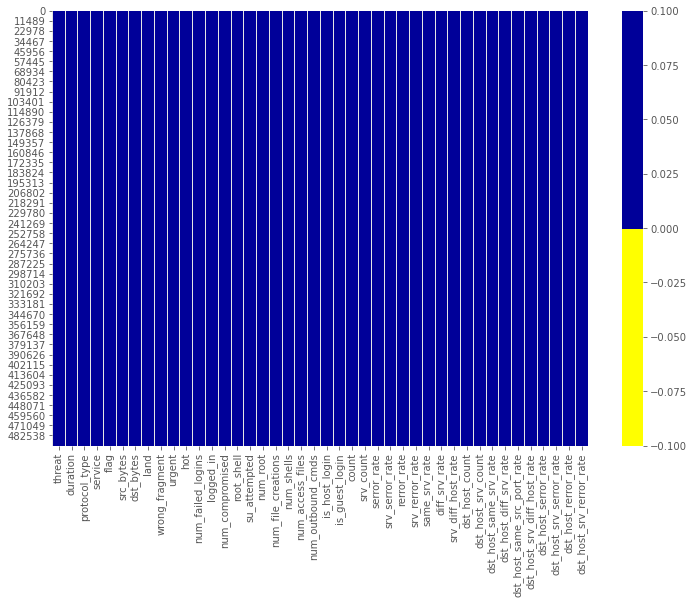

In [5]:
cols = traindata.columns[:]
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#ffff00', '#000099'] 
sns.heatmap(traindata[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
for col in traindata.columns:
    pct_missing = np.mean(traindata[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

threat - 0%
duration - 0%
protocol_type - 0%
service - 0%
flag - 0%
src_bytes - 0%
dst_bytes - 0%
land - 0%
wrong_fragment - 0%
urgent - 0%
hot - 0%
num_failed_logins - 0%
logged_in - 0%
num_compromised - 0%
root_shell - 0%
su_attempted - 0%
num_root - 0%
num_file_creations - 0%
num_shells - 0%
num_access_files - 0%
num_outbound_cmds - 0%
is_host_login - 0%
is_guest_login - 0%
count - 0%
srv_count - 0%
serror_rate - 0%
srv_serror_rate - 0%
rerror_rate - 0%
srv_rerror_rate - 0%
same_srv_rate - 0%
diff_srv_rate - 0%
srv_diff_host_rate - 0%
dst_host_count - 0%
dst_host_srv_count - 0%
dst_host_same_srv_rate - 0%
dst_host_diff_srv_rate - 0%
dst_host_same_src_port_rate - 0%
dst_host_srv_diff_host_rate - 0%
dst_host_serror_rate - 0%
dst_host_srv_serror_rate - 0%
dst_host_rerror_rate - 0%
dst_host_srv_rerror_rate - 0%


In [7]:
for col in traindata.columns:
    print(traindata[col].describe())

count    494021.000000
mean          0.803089
std           0.397665
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: threat, dtype: float64
count    494021.000000
mean         47.979302
std         707.746472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       58329.000000
Name: duration, dtype: float64
count    494021.000000
mean          2.189338
std           0.960704
min           1.000000
25%           1.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: protocol_type, dtype: float64
count    494021.000000
mean         38.995435
std          19.698954
min           1.000000
25%          24.000000
50%          54.000000
75%          54.000000
max          70.000000
Name: service, dtype: float64
count    494021.000000
mean          2.391617
std           2.649054
min           1.000000
25%           1.000000
50%           1.000000


<AxesSubplot:>

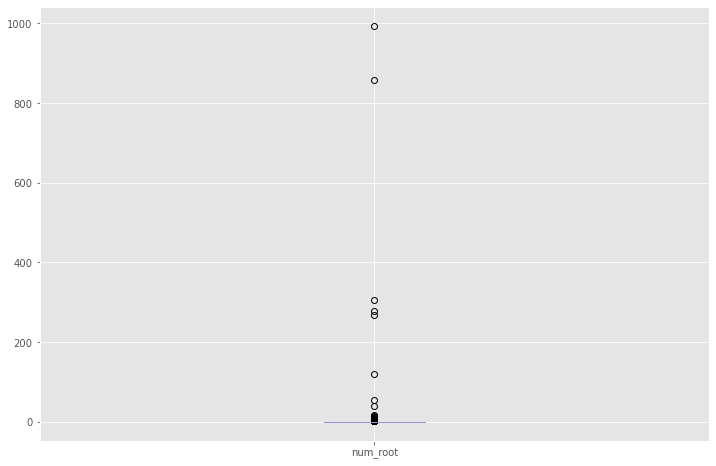

In [8]:
traindata.boxplot(column=['num_root'])

<AxesSubplot:>

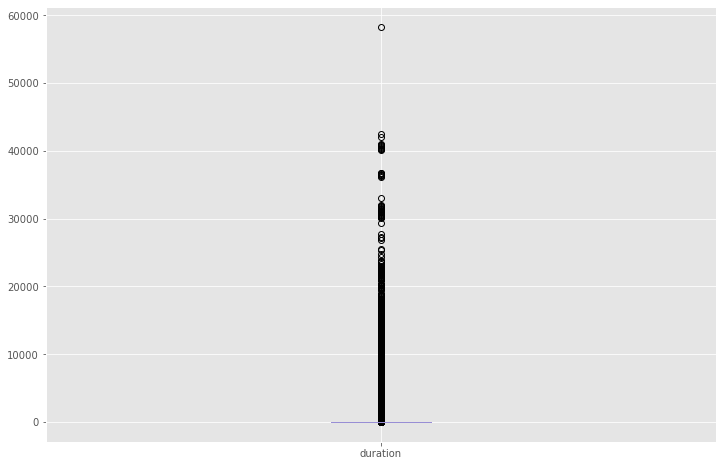

In [9]:
traindata.boxplot(column=['duration'])

<AxesSubplot:>

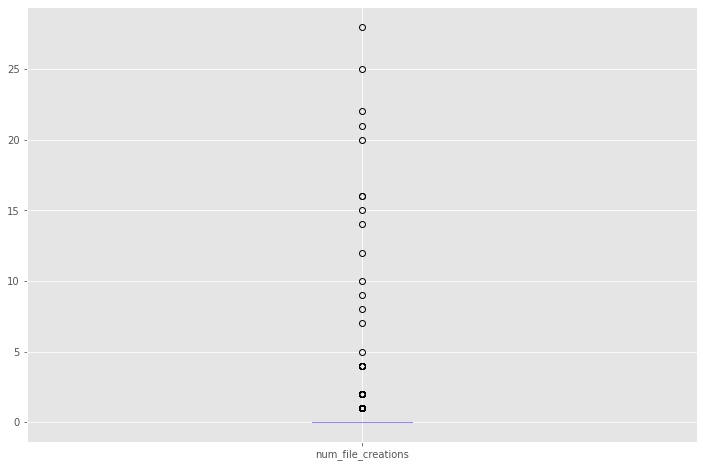

In [10]:
traindata.boxplot(column=['num_file_creations'])

In [12]:
num_rows = len(traindata.index)
low_info_cols = [] 

for col in traindata.columns:
    cnts = traindata[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_info_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

duration: 97.50011%
0        481671
1          2476
2           870
3           625
5           554
          ...  
10136         1
669           1
11160         1
20116         1
5502          1
Name: duration, Length: 2495, dtype: int64

land: 99.99555%
0    493999
1        22
Name: land, dtype: int64

wrong_fragment: 99.74940%
0    492783
3       970
1       268
Name: wrong_fragment, dtype: int64

urgent: 99.99919%
0    494017
1         2
3         1
2         1
Name: urgent, dtype: int64

hot: 99.35387%
0     490829
2       2192
28       274
1        256
4        112
6        104
5         51
3         38
14        37
30        28
22        28
19        23
18        13
24        13
20        10
7          5
17         2
12         2
15         1
16         1
10         1
9          1
Name: hot, dtype: int64

num_failed_logins: 99.98725%
0    493958
1        57
2         3
5         1
4         1
3         1
Name: num_failed_logins, dtype: int64

num_compromised: 99.54982%
0      49

In [4]:
traindata.drop(columns = ["num_outbound_cmds","is_host_login"])

,threat,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,1,1,1,181,5450,0,0,0,...,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0
1,0,0,1,1,1,239,486,0,0,0,...,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
2,0,0,1,1,1,235,1337,0,0,0,...,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0,0,1,1,1,219,1337,0,0,0,...,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
4,0,0,1,1,1,217,2032,0,0,0,...,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,0,1,1,1,310,1881,0,0,0,...,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494017,0,0,1,1,1,282,2286,0,0,0,...,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494018,0,0,1,1,1,203,1200,0,0,0,...,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494019,0,0,1,1,1,291,1200,0,0,0,...,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0
